## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
mice_count = merge_df["Mouse ID"].nunique()
mice_count


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice_df = merge_df[merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dupe_mice_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
dupe_mice_count = dupe_mice_df["Mouse ID"].nunique()
dupe_mice_count

1

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df.drop(merge_df[merge_df['Mouse ID'] == "g989"].index, inplace = True)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
merge_df["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
from statistics import median, stdev, variance

summary_df = merge_df[["Drug Regimen","Tumor Volume (mm3)"]]
summary_df.head(10) 

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
5,Ramicane,33.464577
6,Ramicane,31.099498
7,Ramicane,26.546993
8,Ramicane,24.365505
9,Ramicane,22.050126


In [10]:
summary_df = merge_df.groupby("Drug Regimen")
summary_df.head(10)   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [11]:
mean_df = summary_df.mean()
med_df = summary_df.median()
var_df = summary_df.var()
std_df = summary_df.std()
sem_df = summary_df.sem()

combined_df = pd.DataFrame({"Mean": mean_df["Tumor Volume (mm3)"],
                            "Median": med_df["Tumor Volume (mm3)"],
                            "Variance": var_df["Tumor Volume (mm3)"],
                            "Standard Deviation": std_df["Tumor Volume (mm3)"],
                            "Standard Error Mean": sem_df["Tumor Volume (mm3)"],
                            
                            })

combined_df.head()

,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
from statistics import mean, median, stdev, variance
summary_df = merge_df.groupby("Drug Regimen").agg(
    Mean = pd.NamedAgg(column="Tumor Volume (mm3)",aggfunc = "mean"),
    Median = pd.NamedAgg(column="Tumor Volume (mm3)",aggfunc = "median"),
    Variance = pd.NamedAgg(column="Tumor Volume (mm3)",aggfunc = "var"),
    Std_Div = pd.NamedAgg(column="Tumor Volume (mm3)",aggfunc = "std"),
    SEM = pd.NamedAgg(column="Tumor Volume (mm3)",aggfunc = "sem"),
)

summary_df.head(10)

,Mean,Median,Variance,Std_Div,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

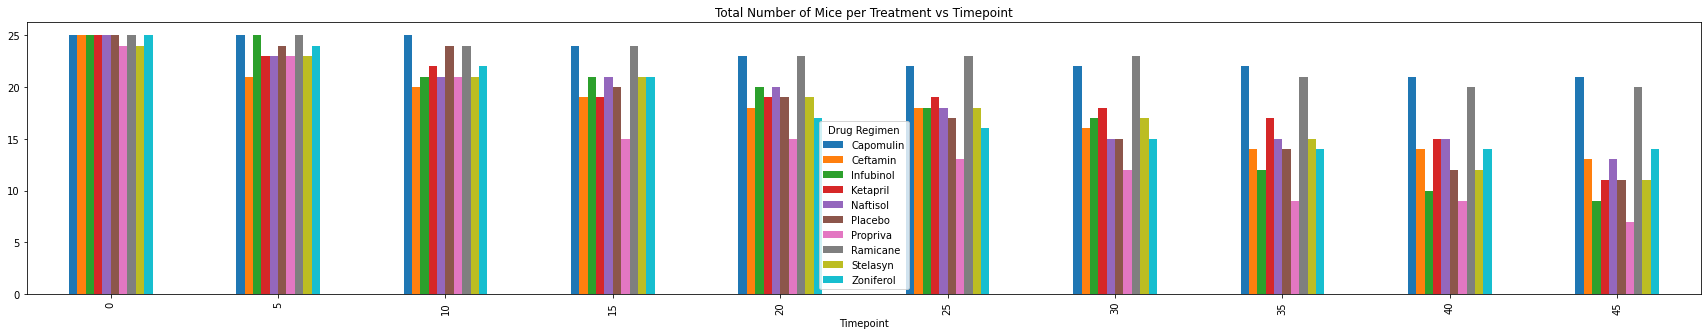

In [29]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_data_df = merge_df.copy()
bar_data_df2 = bar_data_df[["Mouse ID","Drug Regimen","Timepoint"]]

bar_data_df2 = bar_data_df2.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].count().unstack(1).plot(kind='bar', figsize=(30, 5),title='Total Number of Mice per Treatment vs Timepoint')


In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_data = merge_df.copy()

sex_df = pie_plot_data['Sex'].value_counts()

# List of gender 
mice_labels = ['Male', 'Female']


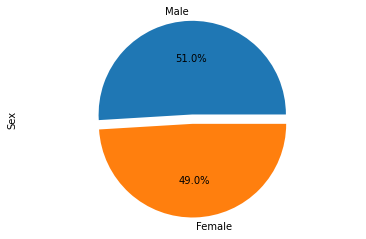

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_df_pie_pandas = pie_plot_data['Sex'].value_counts().plot(kind='pie', x=sex_df, explode=(0.1,0), labels=mice_labels, autopct="%1.1f%%")
mice_gender_df_pie_pandas
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
